#Autism Prediction using Machine Learning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("autism_screening.csv")
print(df.head())
df.shape


Saving autism_screening.csv to autism_screening (2).csv
   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  ...  gender       ethnicity jundice austim  \
0         1         0          0  ...       f  White-European      no     no   
1         1         0          1  ...       m          Latino      no    yes   
2         1         1          1  ...       m          Latino     yes    yes   
3         1         0          1  ...       f  White-European      no    yes   
4         1         0          0  ...       f               ?      no     no   

   contry_of

(704, 21)

In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A1_Score,704.0,0.721591,0.448535,0.0,0.0,1.0,1.0,1.0
A2_Score,704.0,0.453125,0.498152,0.0,0.0,0.0,1.0,1.0
A3_Score,704.0,0.457386,0.498535,0.0,0.0,0.0,1.0,1.0
A4_Score,704.0,0.495739,0.500337,0.0,0.0,0.0,1.0,1.0
A5_Score,704.0,0.498580,0.500353,0.0,0.0,0.0,1.0,1.0
A6_Score,704.0,0.284091,0.451301,0.0,0.0,0.0,1.0,1.0
A7_Score,704.0,0.417614,0.493516,0.0,0.0,0.0,1.0,1.0
A8_Score,704.0,0.649148,0.477576,0.0,0.0,1.0,1.0,1.0
A9_Score,704.0,0.323864,0.468281,0.0,0.0,0.0,1.0,1.0
A10_Score,704.0,0.573864,0.494866,0.0,0.0,1.0,1.0,1.0


In [ ]:
df['ethnicity'].value_counts()

,count
ethnicity,
White-European,233
Asian,123
?,95
Middle Eastern,92
Black,43
South Asian,36
Others,30
Latino,20
Hispanic,13


In [ ]:
df['relation'].value_counts()

,count
relation,
Self,522
?,95
Parent,50
Relative,28
Others,5
Health care professional,4


     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         1         1         1         0         0         1   
1           1         1         0         1         0         0         0   
2           1         1         0         1         1         0         1   
3           1         1         0         1         0         0         1   
4           1         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
699         0         1         0         1         1         0         1   
700         1         0         0         0         0         0         0   
701         1         0         1         1         1         0         1   
702         1         0         0         1         1         0         1   
703         1         0         1         1         1         0         1   

     A8_Score  A9_Score  A10_Score  ...  gender       ethnicity jundice  \


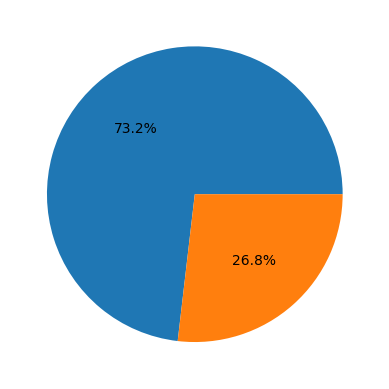

In [ ]:
df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})
print(df)
plt.pie(df['Class/ASD'].value_counts().values, autopct='%1.1f%%')
plt.show()


In [ ]:
ints = []
objects = []
floats = []
for col in df.columns:
  if df[col].dtype == int:
    ints.append(col)
  elif df[col].dtype == object:
    objects.append(col)
  else:
    floats.append(col)
print("Int columns:", ints)
print("Object columns:", objects)
print("Float columns:", floats)


Int columns: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'jundice', 'austim', 'used_app_before']
Object columns: ['gender', 'ethnicity', 'contry_of_res', 'age_desc', 'relation', 'Class/ASD']
Float columns: ['age', 'result']


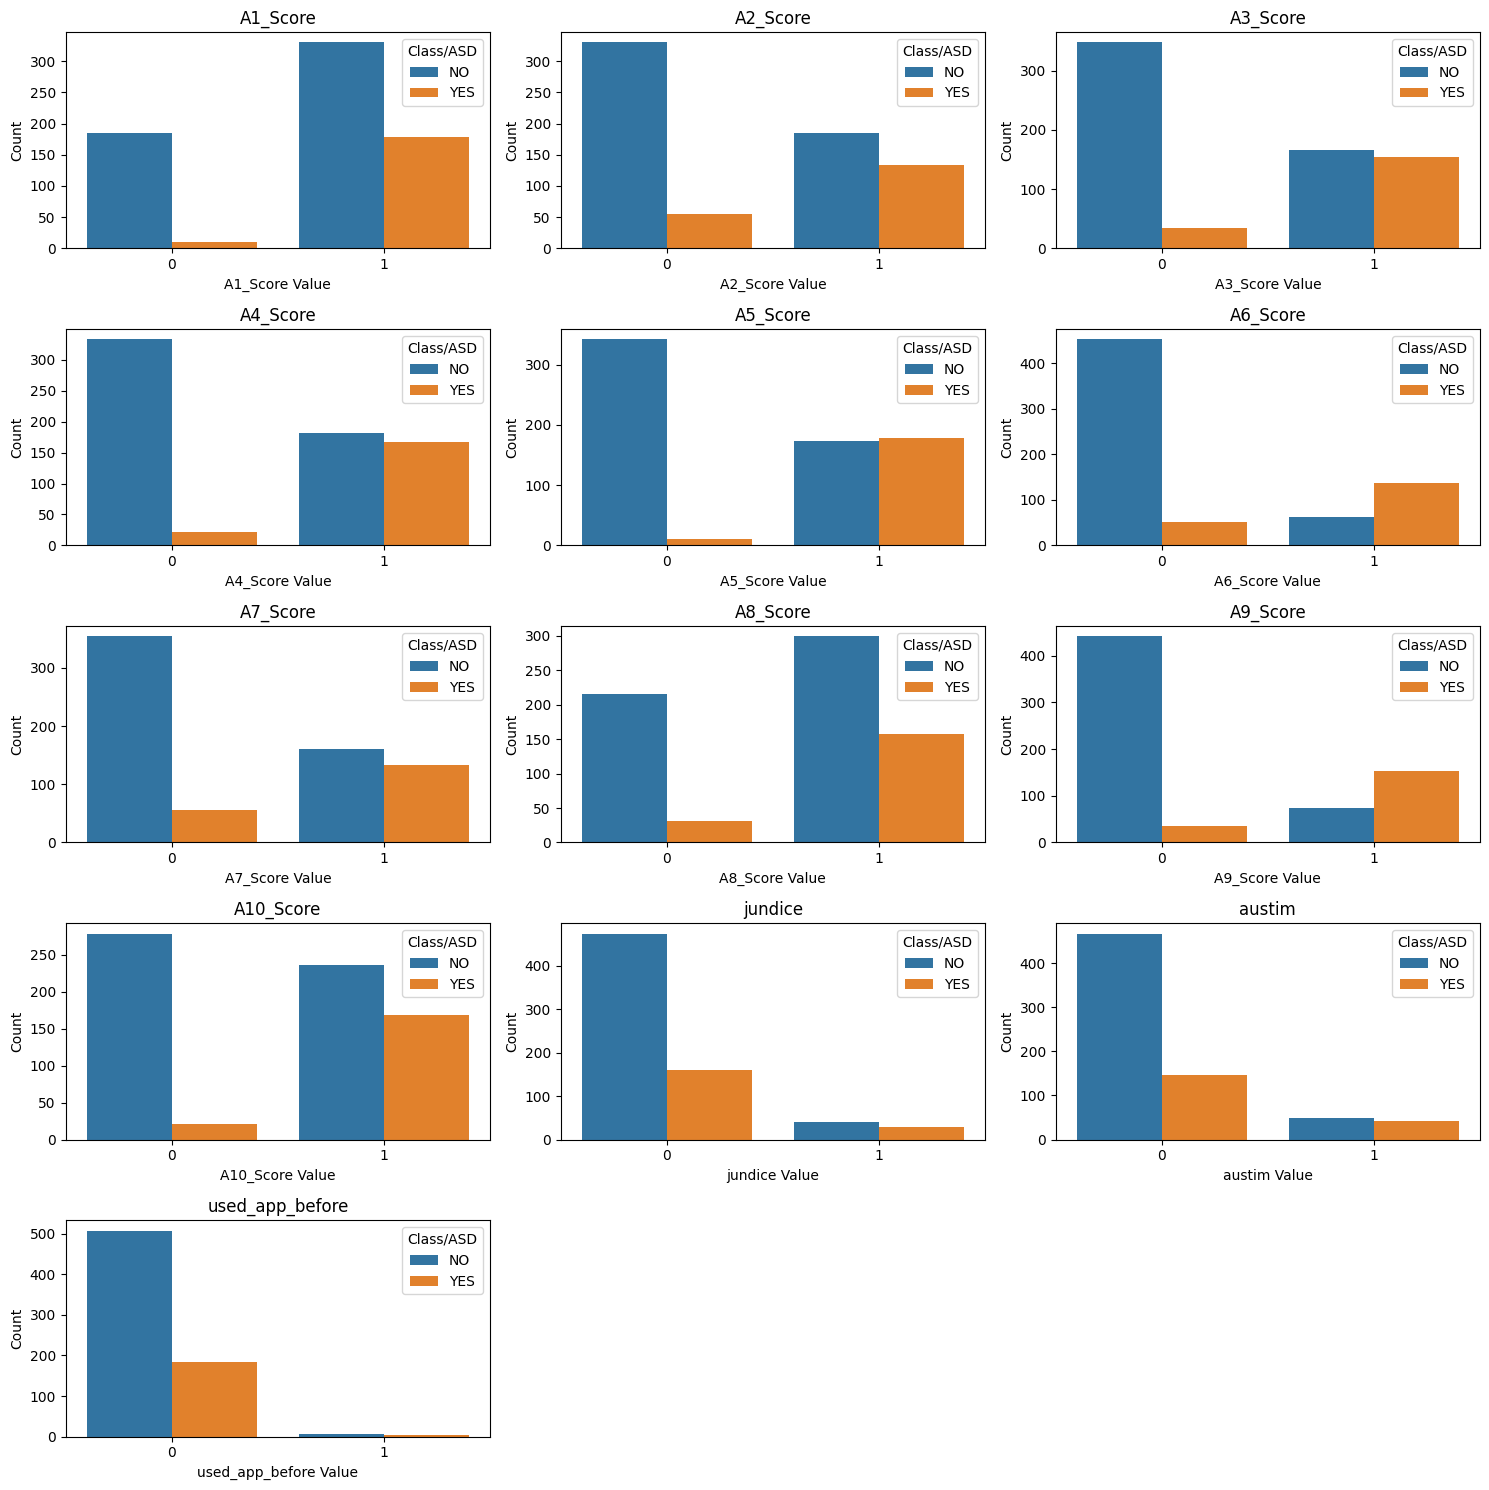

In [ ]:
%matplotlib inline
import math
import seaborn as sb
import matplotlib.pyplot as plt

# remove unwanted columns
if 'Class/ASD' in ints:
    ints.remove('Class/ASD')

n_plots = len(ints)
n_cols = 3
n_rows = math.ceil(n_plots / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 15))
axs = axs.flatten()

for i, col in enumerate(ints):
    axs[i].set_title(col)
    sb.countplot(x=df[col], hue=df['Class/ASD'], ax=axs[i])
    axs[i].set_xlabel(f"{col} Value")   # x-axis label with column name
    axs[i].set_ylabel("Count")          # y-axis label

# remove empty plots
for j in range(len(ints), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


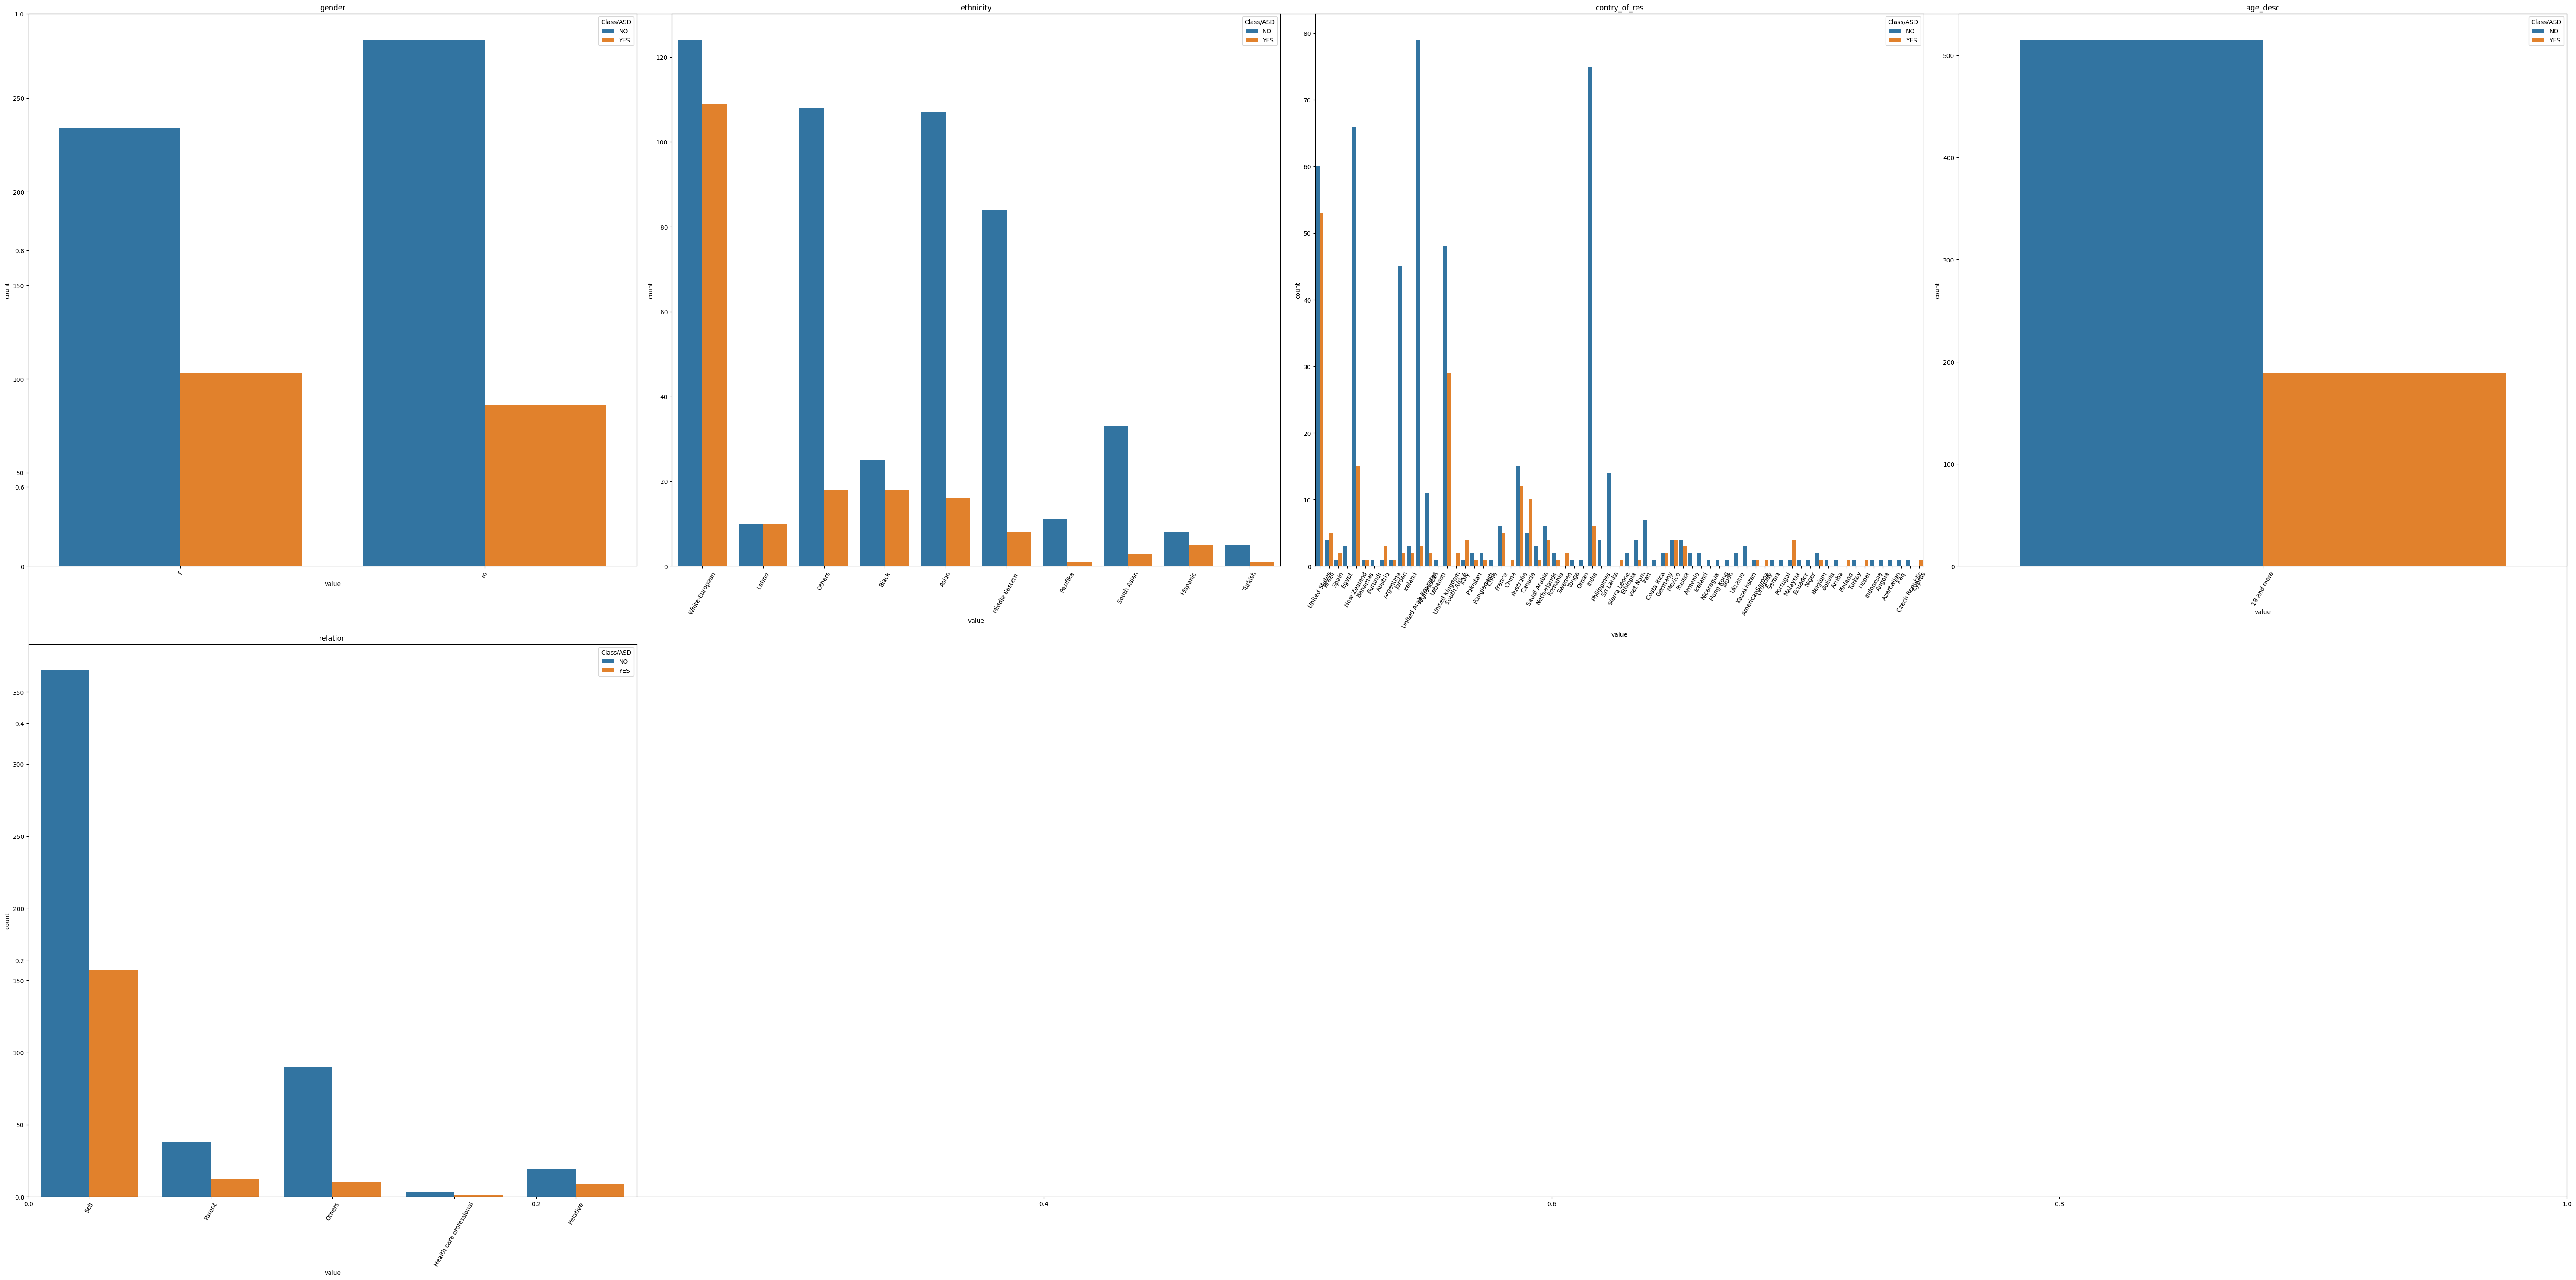

In [ ]:
objects = [col for col in df.columns if df[col].dtype == 'object' and col != 'Class/ASD']

n_cols = 4  # You can adjust the number of columns per row
n_rows = (len(objects) + n_cols - 1) // n_cols

plt.subplots(figsize=(60,30))
for i, col in enumerate(objects):
  melted_df = pd.melt(df, id_vars='Class/ASD', value_vars=[col])
  plt.subplot(n_rows, n_cols, i+1)
  sb.countplot(x='value', hue='Class/ASD', data=melted_df)
  plt.title(col)
  plt.xticks(rotation=60) # Use plt.xticks instead of subplot().xaxis.set_tick_params

plt.tight_layout()
plt.show()

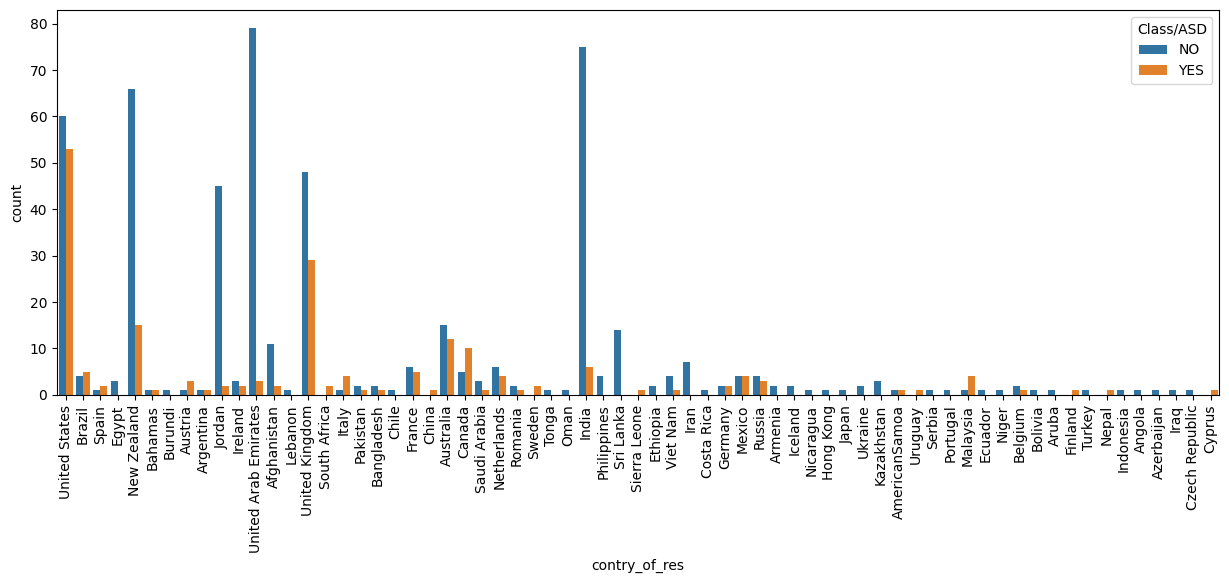

In [ ]:
df = pd.read_csv("autism_screening.csv")
plt.figure(figsize=(15,5))
sb.countplot(data=df, x='contry_of_res', hue='Class/ASD')
plt.xticks(rotation=90)
plt.show()

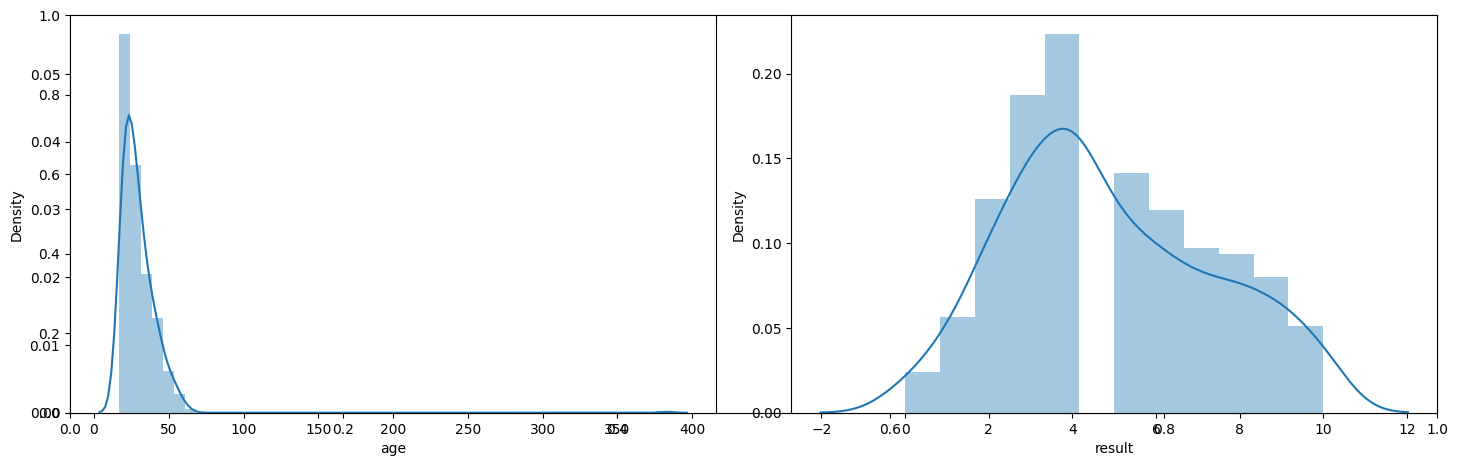

In [ ]:
plt.subplots(figsize=(15,5))
for i, col in enumerate(floats):
 plt.subplot(1,2,i+1)
 sb.distplot(df[col])
plt.tight_layout()
plt.show()

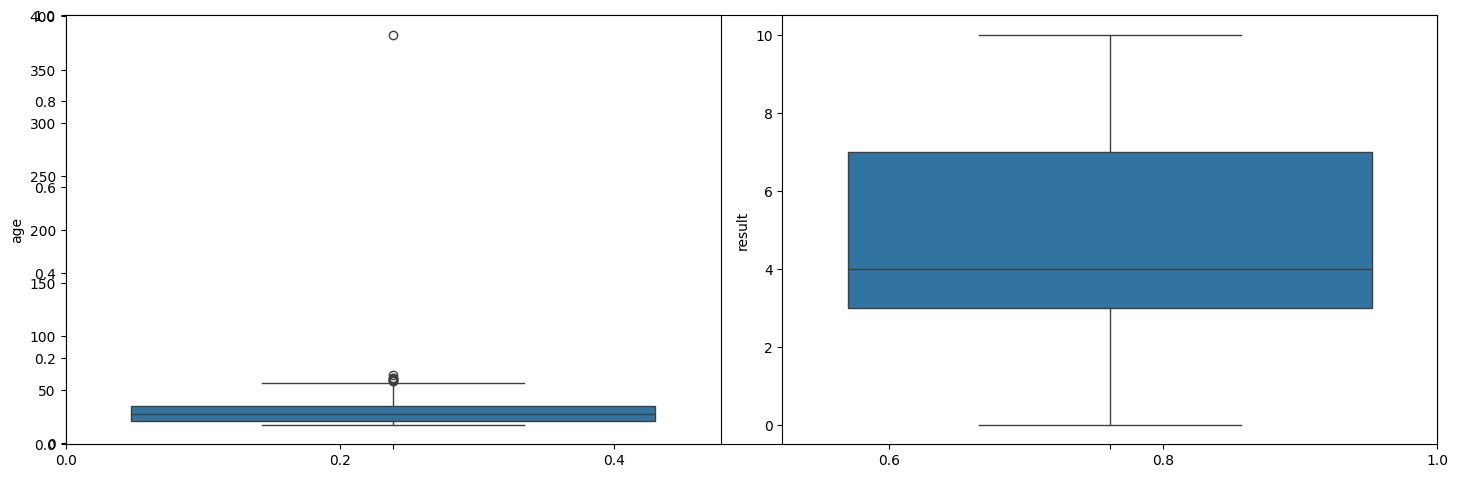

In [ ]:
plt.subplots(figsize=(15,5))
for i, col in enumerate(floats):
 plt.subplot(1,2,i+1)
 sb.boxplot(df[col])
plt.tight_layout()
plt.show()

In [ ]:
df = df[df['result']>-5]
df.shape

(704, 21)

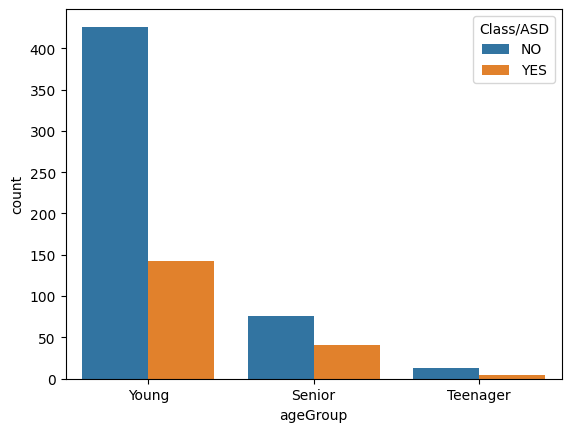

In [ ]:
 # This functions make groups by taking the age as a parameter
def convertAge(age):
  if age < 4:
    return 'Toddler'
  elif age < 12:
    return 'Kid'
  elif age < 18:
    return 'Teenager'
  elif age < 40:
    return 'Young'
  else:
    return 'Senior'
df['ageGroup'] = df['age'].apply(convertAge)
sb.countplot(x=df['ageGroup'], hue=df['Class/ASD'])
plt.show()

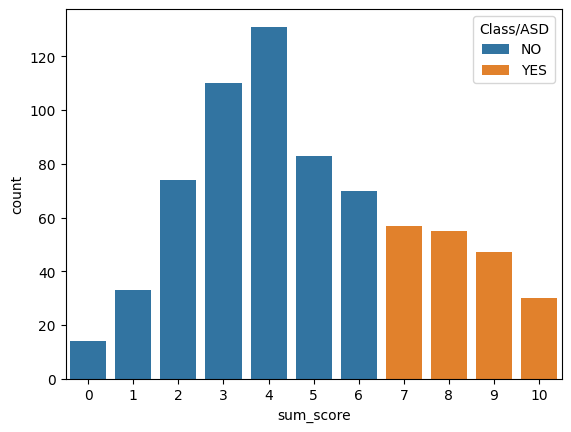

In [ ]:
def add_feature(data):

  # Creating a column with all values zero
  data['sum_score'] = 0
  for col in data.loc[:,'A1_Score':'A10_Score'].columns:

    # Updating the 'sum_score' value with scores
    # from A1 to A10
    data['sum_score'] += data[col]

  # Creating a random data using the below three columns
  data['ind'] = data['austim'] + data['used_app_before'] + data['jundice']

  return data

df = add_feature(df)
sb.countplot(x=df['sum_score'], hue=df['Class/ASD'])
plt.show()

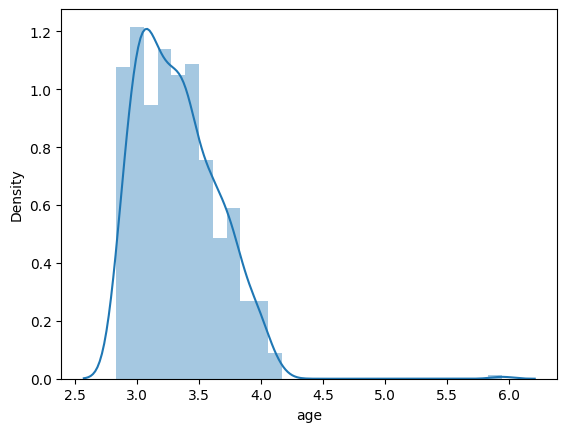

In [ ]:
# Applying log transformations to remove the skewness of the data.
df['age'] = df['age'].apply(lambda x: np.log(x))
sb.distplot(df['age'])
plt.show()

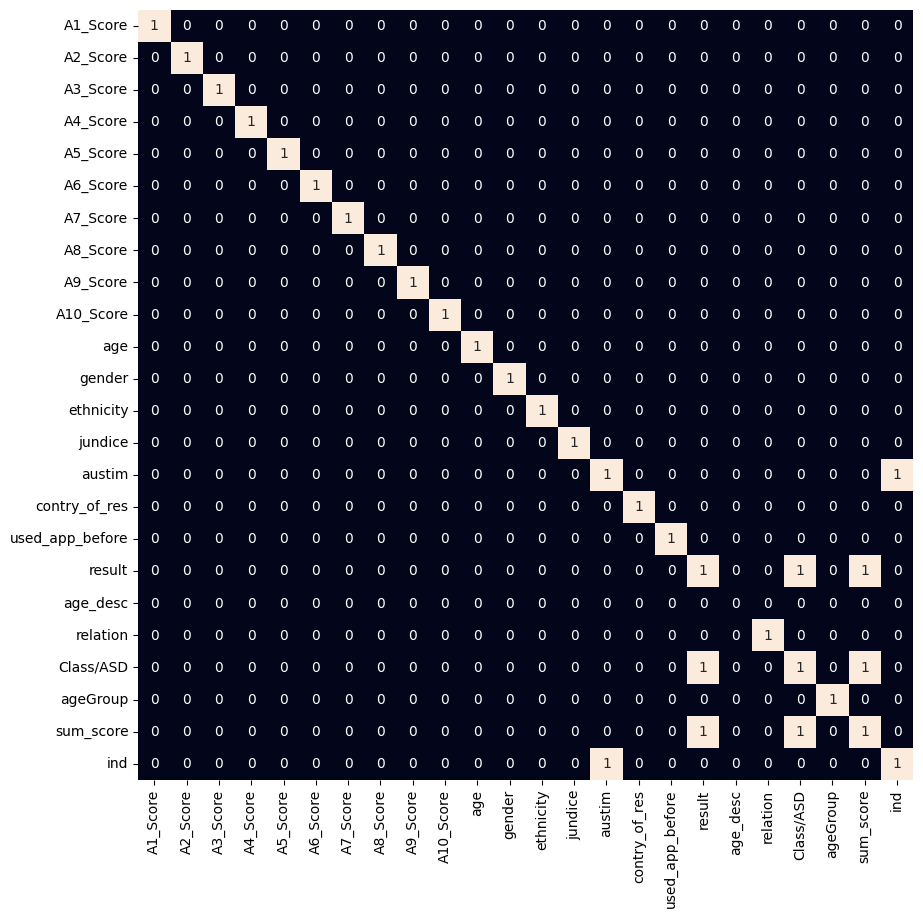

In [ ]:
def encode_labels(data):
    for col in data.columns:

      # Here we will check if datatype
      # is object then we will encode it
      if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

    return data

df = encode_labels(df)

# Making a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

In [ ]:
removal = [ 'age_desc', 'used_app_before', 'austim']
features = df.drop(removal + ['Class/ASD'], axis=1)
target = df['Class/ASD']
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.2, random_state=10)

# As the data was highly imbalanced we will balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
X, Y = ros.fit_resample(X_train,Y_train)
X.shape, Y.shape

((820, 20), (820,))

In [ ]:
import numpy as np
import pandas as pd

# Replace inf/-inf with NaN
X = pd.DataFrame(X)  # if it's numpy, wrap into DataFrame for convenience
X = X.replace([np.inf, -np.inf], np.nan)

# Drop or fill NaN
X = X.fillna(0)   # or you can use .dropna()

# Convert back to numpy if needed
X = X.values

# Now scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)


In [ ]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for model in models:
  model.fit(X, Y)

  print(f'{model} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val)))
  print()

LogisticRegression() : 
Training Accuracy :  1.0
Validation Accuracy :  1.0

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  1.0

SVC() : 
Training Accuracy :  1.0
Validation Accuracy :  0.9765873015873017



Confusion Matrix for LogisticRegression():


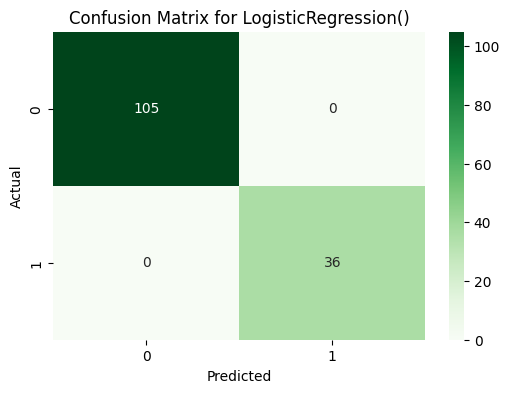


Confusion Matrix for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...):


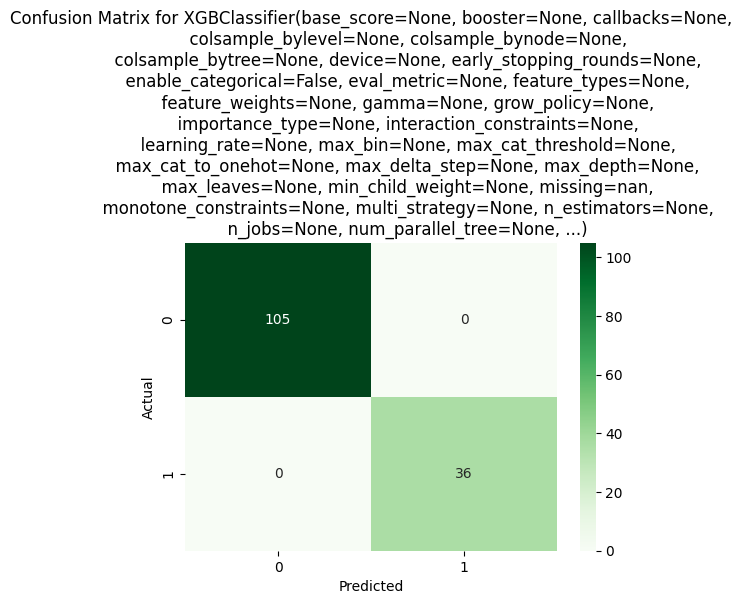


Confusion Matrix for SVC():


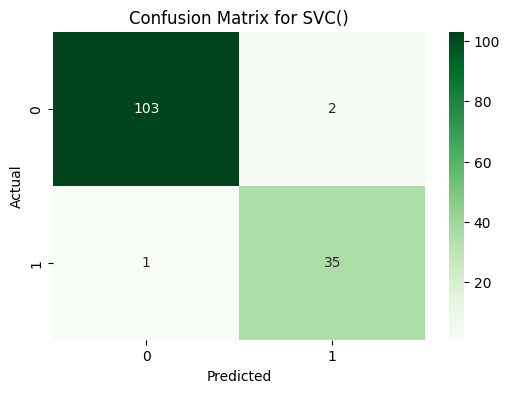

In [ ]:
from sklearn.metrics import confusion_matrix

for model in models:
  print(f'Confusion Matrix for {model}:')
  # Calculate the confusion matrix
  cm = confusion_matrix(Y_val, model.predict(X_val))

  # Plot the confusion matrix as a heatmap
  plt.figure(figsize=(6, 4))
  sb.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=True)

  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(f'Confusion Matrix for {model}')
  plt.show()
  print()